In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [10]:
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [13]:
x = df.drop("target",axis=1)
y = df["target"]
print(x.shape)
print(y.shape)

(1025, 13)
(1025,)


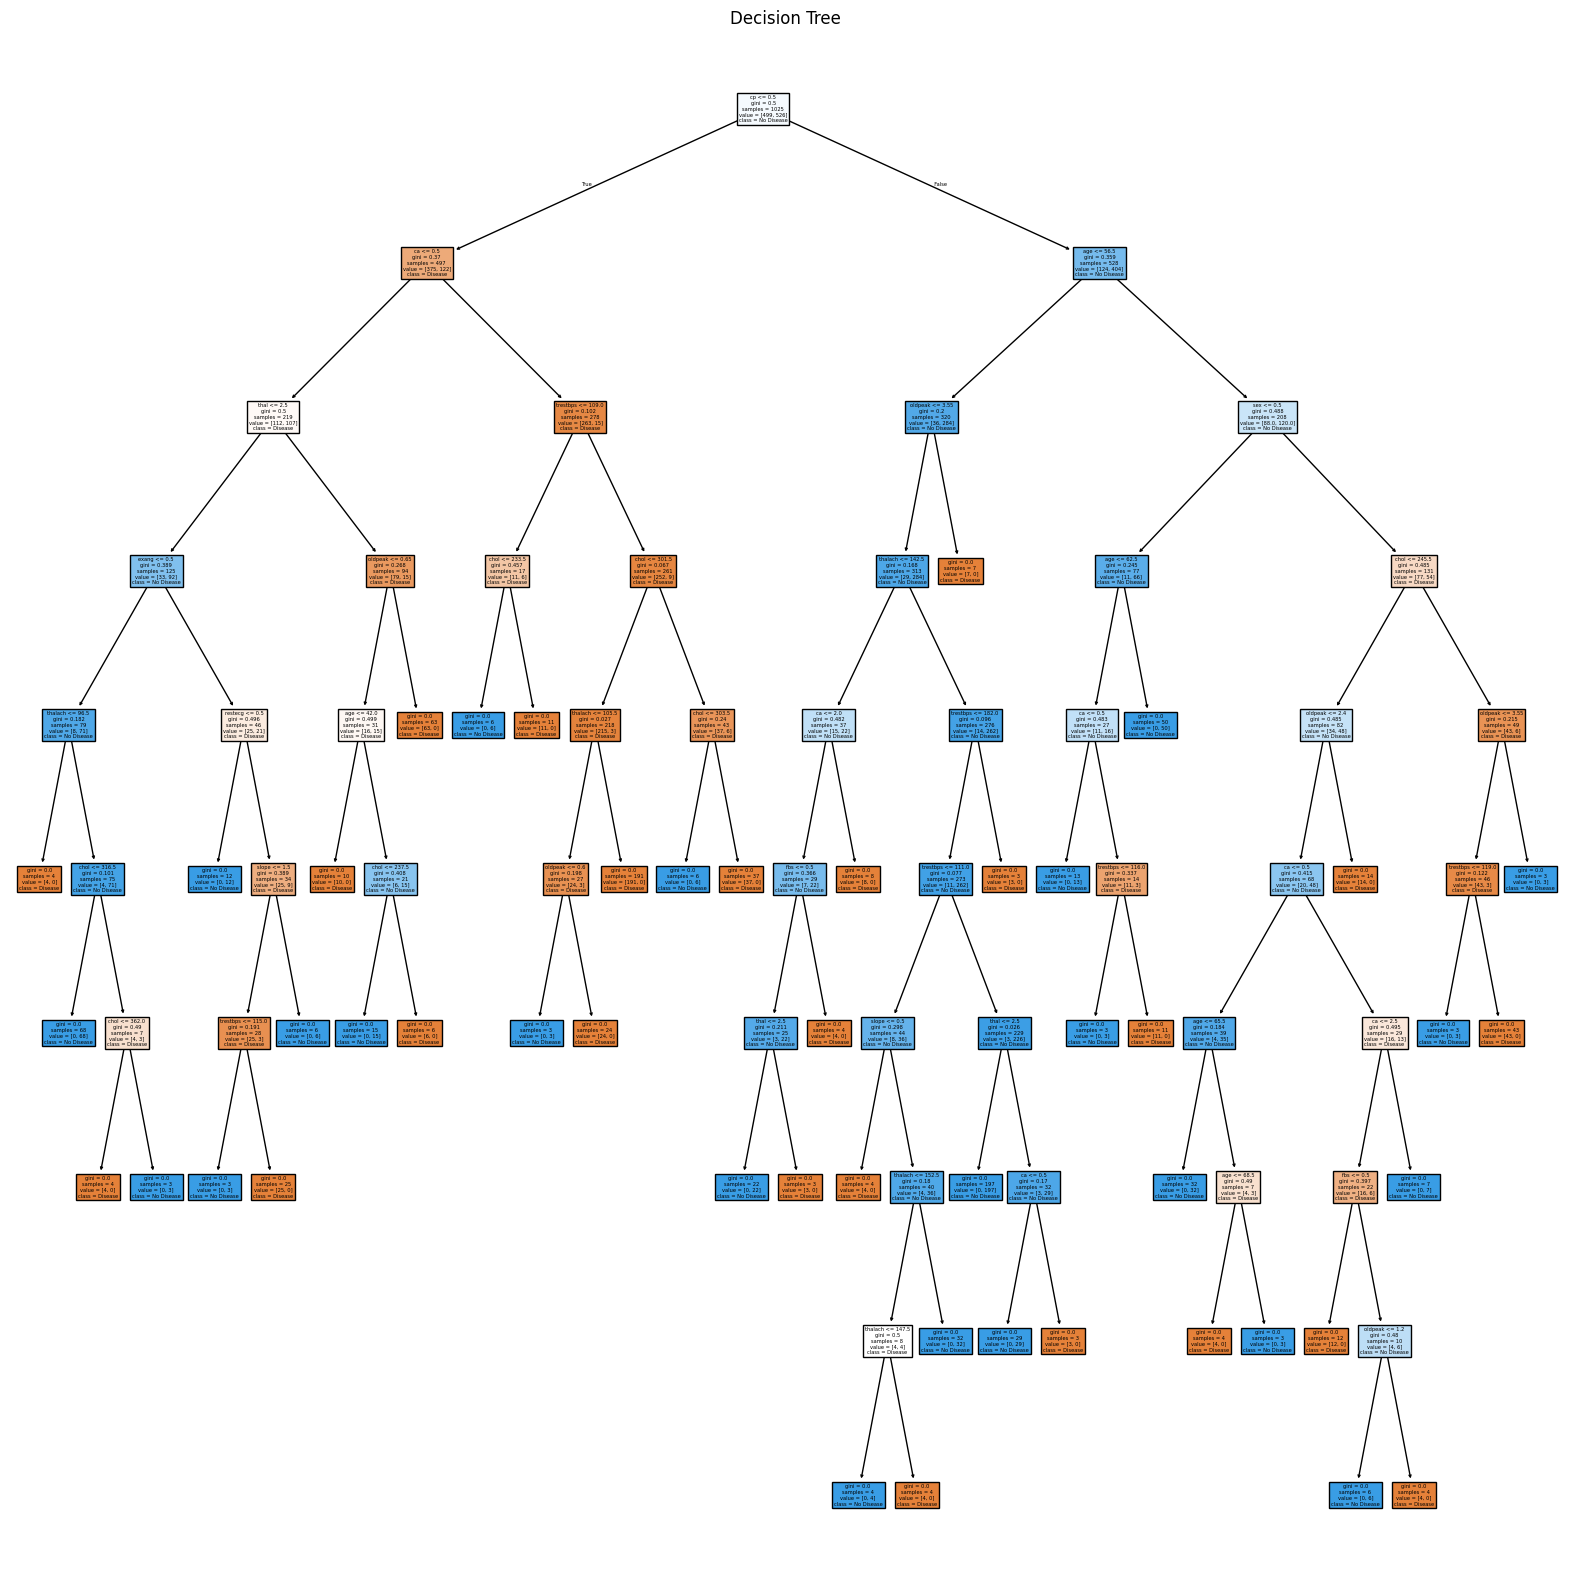

In [15]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x,y)

plt.figure(figsize=(20,20))
plot_tree(tree_clf,feature_names=x.columns,class_names=['Disease','No Disease'],filled=True)
plt.title("Decision Tree")
plt.show()

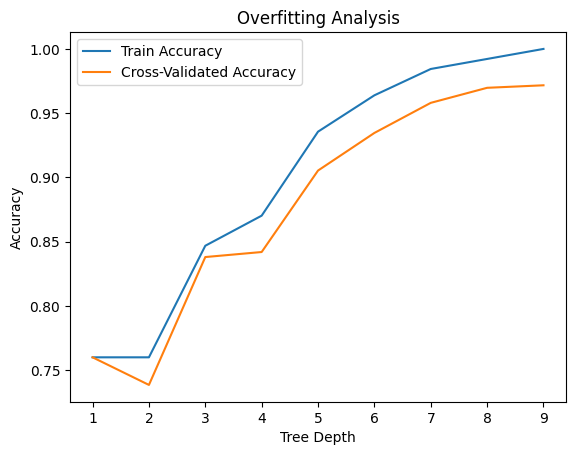

In [16]:
train_scores = []
test_scores = []
depths = range(1, 10)

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(x, y)
    train_scores.append(clf.score(x, y))

    test_scores.append(np.mean(cross_val_score(clf, x, y, cv=3)))

plt.plot(depths, train_scores, label="Train Accuracy")
plt.plot(depths, test_scores, label="Cross-Validated Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis")
plt.legend()
plt.show()


In [17]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x,y)
dt_acc = np.mean(cross_val_score(tree_clf,x,y,cv=3))
rf_acc = np.mean(cross_val_score(rf,x,y,cv=3))
print("Decision Tree Accuracy:", dt_acc)
print("Random Forest Accuracy:", rf_acc)

Decision Tree Accuracy: 0.974621712312714
Random Forest Accuracy: 0.9804782402405493


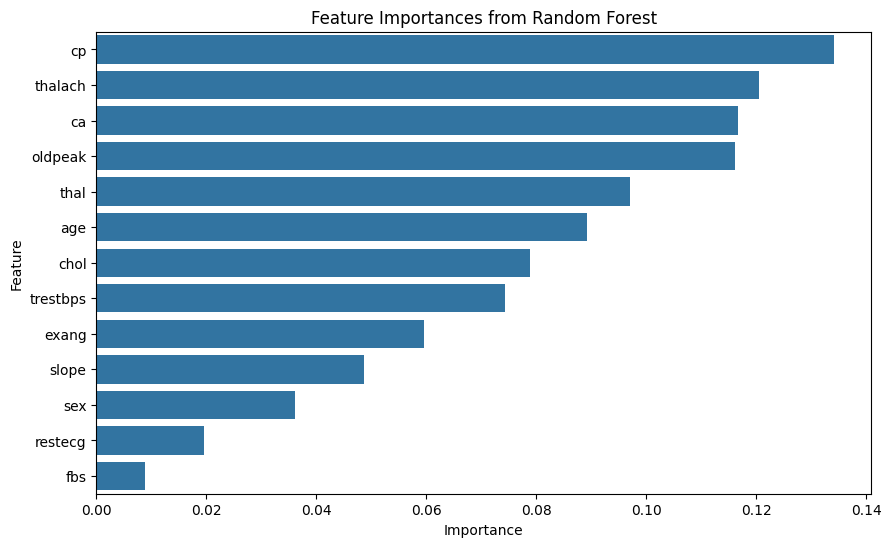

In [19]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=x.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


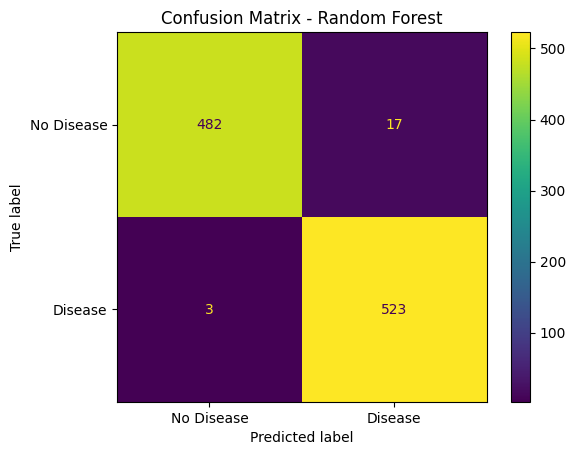

              precision    recall  f1-score   support

  No Disease       0.99      0.97      0.98       499
     Disease       0.97      0.99      0.98       526

    accuracy                           0.98      1025
   macro avg       0.98      0.98      0.98      1025
weighted avg       0.98      0.98      0.98      1025



In [21]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = cross_val_predict(rf, x, y, cv=3)
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

print(classification_report(y, y_pred, target_names=["No Disease", "Disease"]))
